In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from math import *

df = pd.DataFrame()
stock="Samsung"
code="005930.KS"
df=yf.download(code, "2019-12-01","2019-12-27")
df['obv']=np.zeros(df.shape[0])
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,obv
Date,,,,,,,
2019-12-02,50900.0,51300.0,50400.0,50400.0,50400.0,18877252,0.0
2019-12-03,49800.0,50300.0,49500.0,49900.0,49900.0,12059812,0.0
2019-12-04,49600.0,49850.0,49000.0,49450.0,49450.0,13246549,0.0
2019-12-05,50200.0,50400.0,49500.0,49500.0,49500.0,10449715,0.0
2019-12-06,50100.0,50900.0,49950.0,50400.0,50400.0,11414563,0.0


In [3]:
stock = input("Enter firm name: ")
code = input("Enter stock name: ")
data = pd.DataFrame()
data[stock]=yf.download(code, "2019-12-01","2019-12-27")["Close"]
data.head()

Enter firm name: Samsung
Enter stock name: 005930.KS
[*********************100%***********************]  1 of 1 completed


,Samsung
Date,
2019-12-02,50400.0
2019-12-03,49900.0
2019-12-04,49450.0
2019-12-05,49500.0
2019-12-06,50400.0


In [4]:
df=pd.read_excel("../data/data.xlsx")
df.head(3)

,일자,KT,SK텔레콤,현대모비스
0,2016/01/04,28000,210500,238000
1,2016/01/05,28200,210000,237000
2,2016/01/06,28100,208000,234500


In [5]:
df.set_index('일자',inplace=True)
df['KT_MA']=df['KT'].rolling(5).mean()
df.head(6)

,KT,SK텔레콤,현대모비스,KT_MA
일자,,,,
2016/01/04,28000,210500,238000,NaN
2016/01/05,28200,210000,237000,NaN
2016/01/06,28100,208000,234500,NaN
2016/01/07,27750,204000,237000,NaN
2016/01/08,27750,208000,238500,27960.0
2016/01/11,27600,203000,241000,27880.0


In [7]:
df.dropna(axis=0,inplace=True)
df.head(5)

,KT,SK텔레콤,현대모비스,KT_MA
일자,,,,
2016/01/08,27750,208000,238500,27960.0
2016/01/11,27600,203000,241000,27880.0
2016/01/12,27500,206500,241500,27740.0
2016/01/13,27650,208500,247000,27650.0
2016/01/14,27350,208500,245000,27570.0


In [10]:
df2 = pd.DataFrame()
stock = "samsung"
code="005930.KS"
df2[stock]=yf.download(code, "2019-12-01","2019-12-27")["Close"]
df2['change']=df2[stock].diff(1)
df2.head()

[*********************100%***********************]  1 of 1 completed


,samsung,change
Date,,
2019-12-02,50400.0,NaN
2019-12-03,49900.0,-500.0
2019-12-04,49450.0,-450.0
2019-12-05,49500.0,50.0
2019-12-06,50400.0,900.0


In [11]:
df=pd.read_excel("../data/data.xlsx")
df.head(3)

,일자,KT,SK텔레콤,현대모비스
0,2016/01/04,28000,210500,238000
1,2016/01/05,28200,210000,237000
2,2016/01/06,28100,208000,234500


In [12]:
df=pd.read_excel("../data/data.xlsx")
df.set_index('일자',inplace=True)
df.head(3)

,KT,SK텔레콤,현대모비스
일자,,,
2016/01/04,28000,210500,238000
2016/01/05,28200,210000,237000
2016/01/06,28100,208000,234500


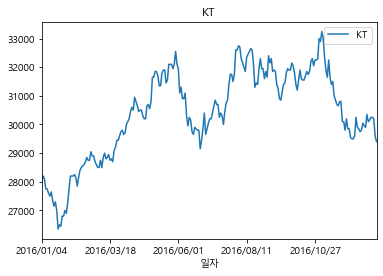

In [15]:
df['KT'].plot(title="KT",legend=True)

In [33]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == "Darwin":
    rc('font', family='AppleGothic')
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System... sorry~~~')
    
%matplotlib inline

In [17]:
df2=df

In [24]:
df2['KT_MA']=df2['KT'].rolling(5).mean()
df2.dropna(axis=0,inplace=True)
df2.head()

,KT,SK텔레콤,현대모비스,KT_MA
일자,,,,
2016/01/08,27750,208000,238500,27960.0
2016/01/11,27600,203000,241000,27880.0
2016/01/12,27500,206500,241500,27740.0
2016/01/13,27650,208500,247000,27650.0
2016/01/14,27350,208500,245000,27570.0


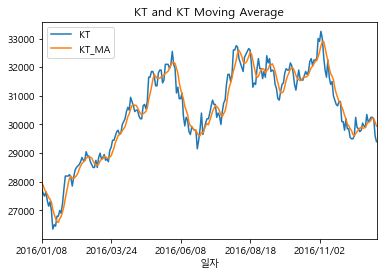

In [25]:
df2[['KT','KT_MA']].plot(title = "KT and KT Moving Average", legend = True)

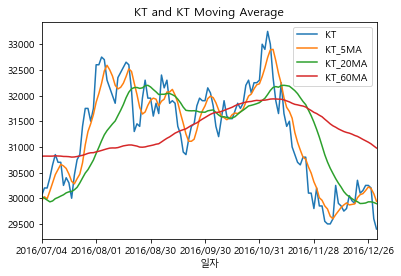

In [29]:
df3 = df
df3["KT_5MA"]=df3['KT'].rolling(5).mean()
df3["KT_20MA"]=df3['KT'].rolling(20).mean()
df3["KT_60MA"]=df3['KT'].rolling(60).mean()
df3.dropna(axis=0,inplace=True)
df3.head()

df3[['KT','KT_5MA','KT_20MA','KT_60MA']].plot( title = "KT and KT Moving Average", legend =True)

In [ ]:
#MACD 구하기
stock = input("Enter firm name: ")
code = input("Enter stock name: ")
data = pd.DataFrame()
data[stock]=yf.download(code, "2019-01-01","2019-12-27")["Close"]
data.head()

#stock = "samsung"
#code="005930.KS"

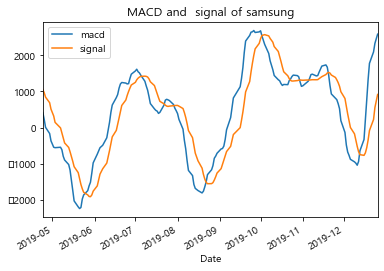

In [34]:
data["MA_10"]=data[stock].rolling(10).mean()
data["MA_30"]=data[stock].rolling(30).mean()
data["macd"]=data["MA_10"]-data["MA_30"]
data["signal"]=data["macd"].rolling(10).mean()
data.dropna(inplace=True)
data[["macd","signal"]].plot(title="MACD and  signal of " + stock ,legend=True)

In [1]:
data

NameError: name 'data' is not defined